# Credit Card Customer Segmentation

### Data Set

Credit Card Customer Data.xlsx

### Objective:

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

## Load Liabries and Data

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install plotly==4.10.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install umap-learn[plot]

Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from scipy.stats import zscore
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

In [43]:
#Load data
Customer_CC_df = pd.read_excel('Credit Card Customer Data.xlsx')

In [44]:
Customer_CC_df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [45]:
Customer_CC_df.drop("Sl_No", axis=1, inplace=True)

In [46]:
Customer_CC_df.shape

(660, 6)

In [47]:
Customer_CC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [48]:
Customer_CC_df.dtypes

Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [49]:
Customer_CC_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.5,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.0,10.0


In [50]:
Customer_CC_df[['Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

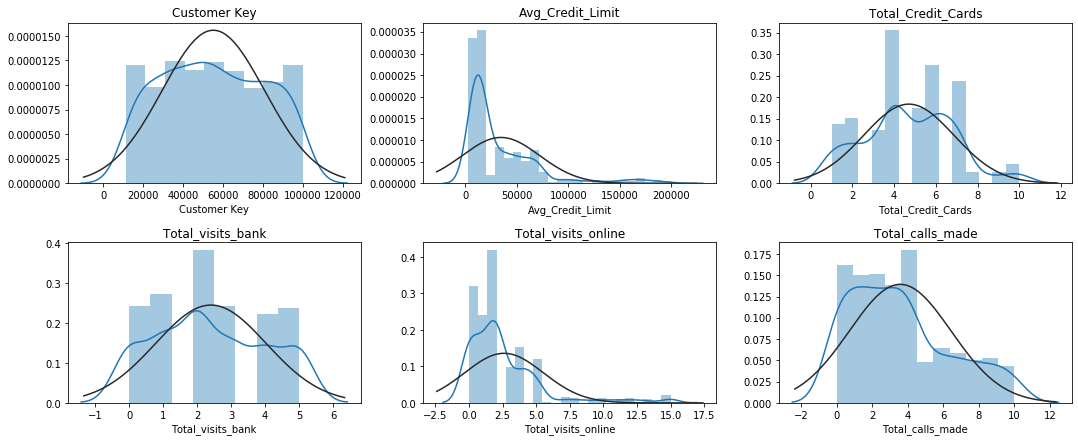

In [51]:
from scipy.stats import norm 

graph_by_variables = ['Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
plt.figure(figsize=(15,18))

for i in range(0,6):
    plt.subplot(6,3,i+1)
    sns.distplot(Customer_CC_df[graph_by_variables[i]].dropna(),fit=norm)
    plt.title(graph_by_variables[i])

plt.tight_layout()

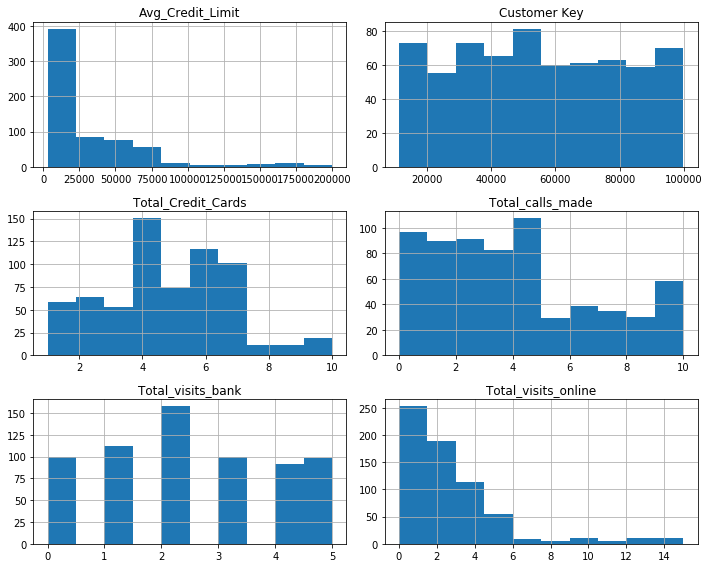

In [52]:
Customer_CC_df[['Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].hist(figsize=(10,8))
plt.tight_layout()

## Correlation Matrix

Text(0.5, 1, 'Correlation Matrix')

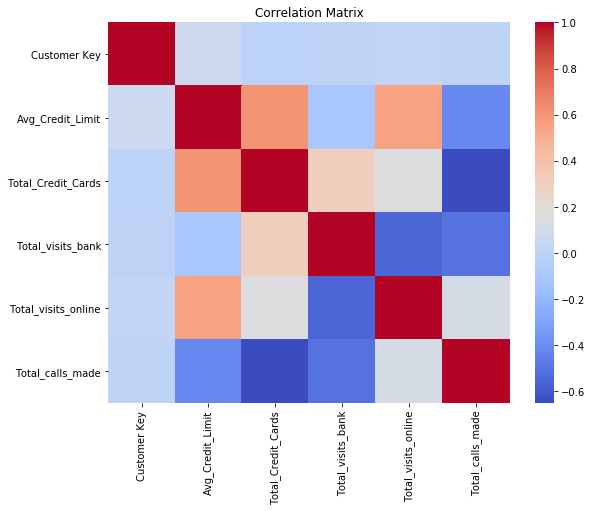

In [53]:
plt.figure(figsize=(9,7))
sns.heatmap(Customer_CC_df.corr(),cmap='coolwarm')

plt.title('Correlation Matrix')

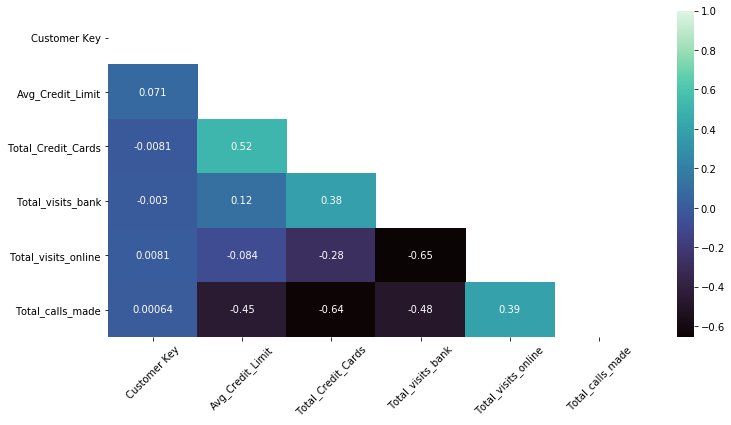

In [54]:
plt.subplots(figsize=(12, 6))
corr = Customer_CC_df.corr('spearman')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

## Boxplot Analysis

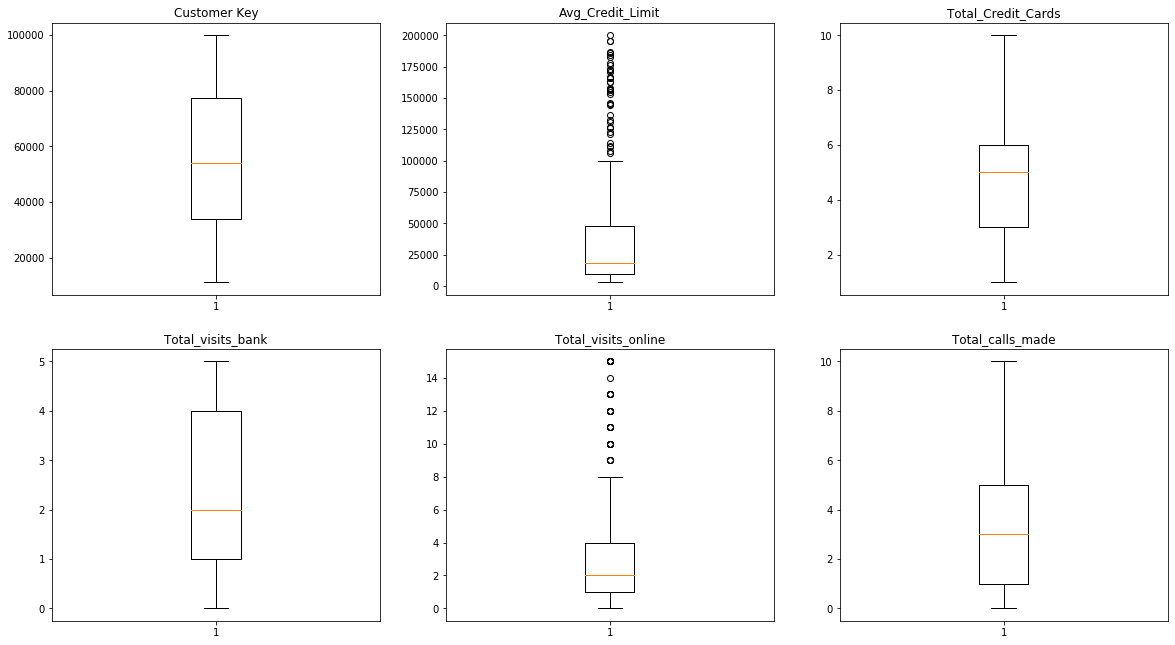

In [55]:
plt.figure(figsize=(20,35))

for i in range(0,6):
    plt.subplot(6, 3, i+1)
    plt.boxplot(Customer_CC_df[graph_by_variables[i]].dropna())
    plt.title(graph_by_variables[i])

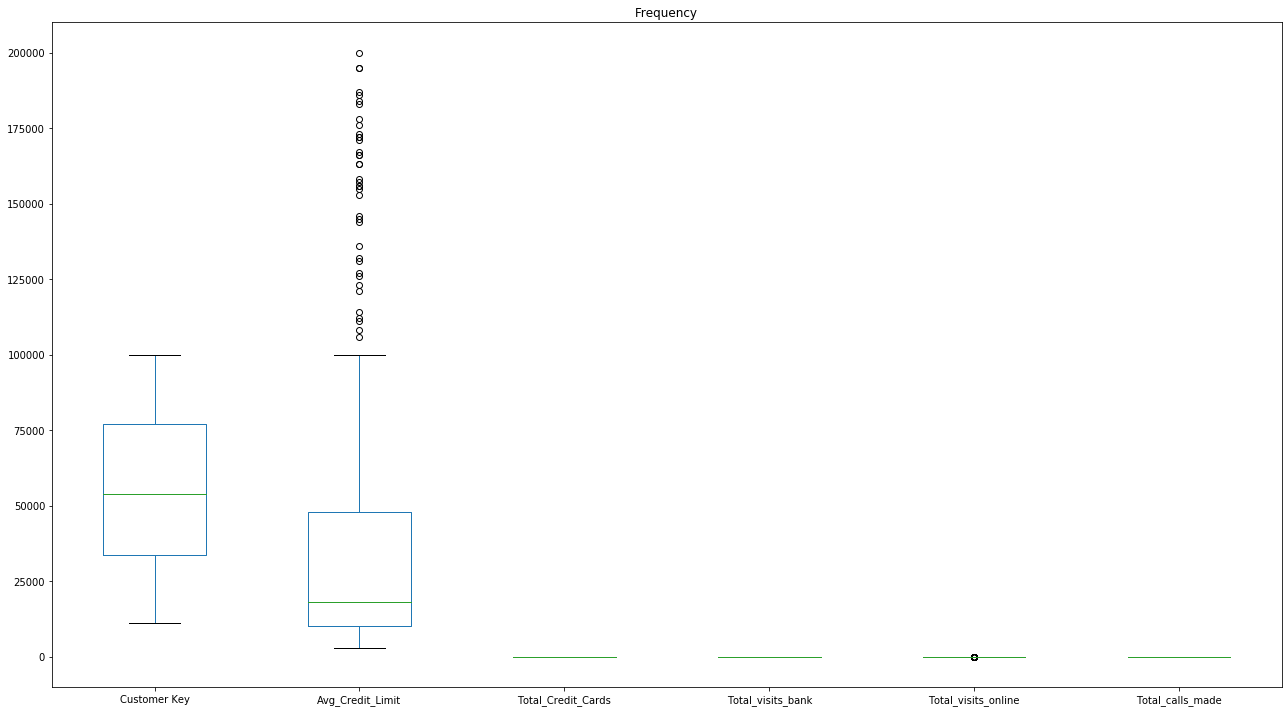

In [56]:
Customer_CC_df[['Customer Key','Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

### Check for NULL Values

In [57]:
Customer_CC_df.isnull().sum().sort_values(ascending=False).head()

Total_calls_made       0
Total_visits_online    0
Total_visits_bank      0
Total_Credit_Cards     0
Avg_Credit_Limit       0
dtype: int64

## Pair Plot Analysis

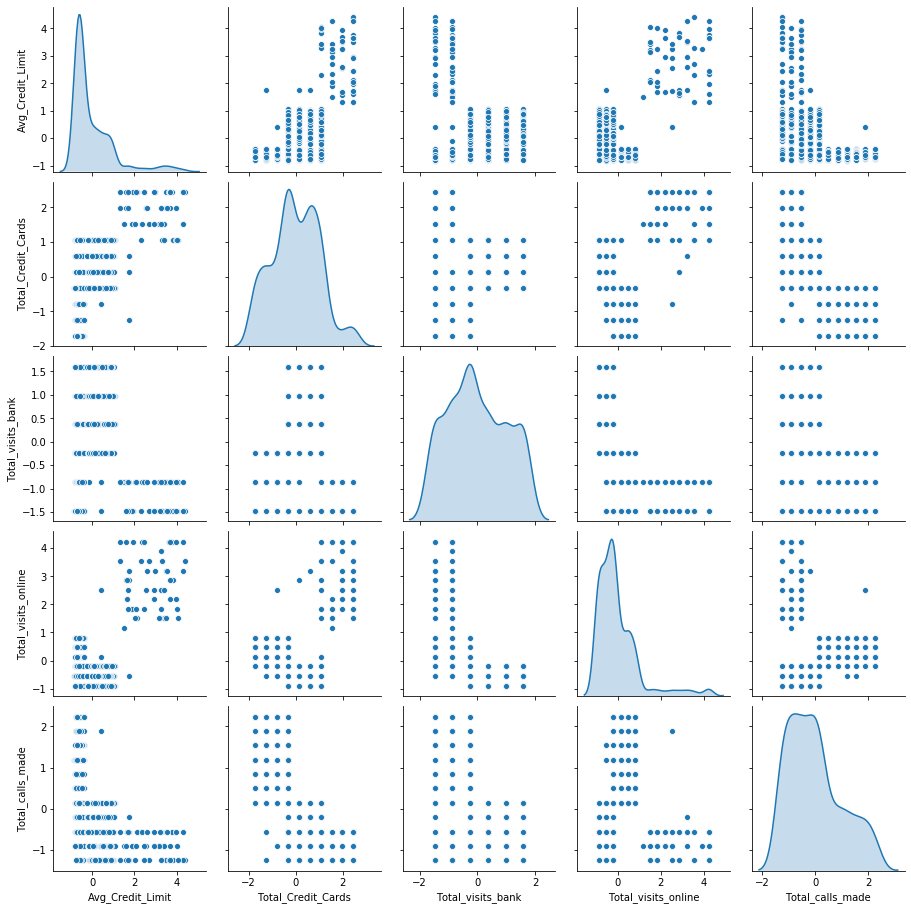

In [61]:
Customer_CC_Attr=Customer_CC_df.iloc[:,1:]
CustomerCCScaled=Customer_CC_Attr.apply(zscore)
sns.pairplot(CustomerCCScaled,diag_kind='kde')

## Kmeans Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

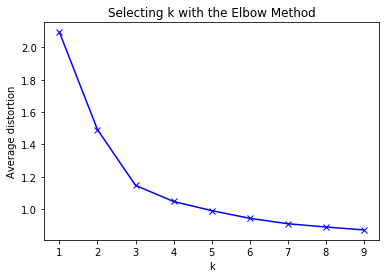

In [74]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(CustomerCCScaled)
    prediction=model.predict(CustomerCCScaled)
    meanDistortions.append(sum(np.min(cdist(CustomerCCScaled, model.cluster_centers_, 'euclidean'), axis=1)) / CustomerCCScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Using the elbow method, it can noted that there is a noticable bend when k = 3. This will be used to group clusters.

In [75]:
# Using cluster of K = 3
final_model=KMeans(3)
final_model.fit(CustomerCCScaled)
prediction=final_model.predict(CustomerCCScaled)

#Append the prediction 
Customer_CC_df["GROUP"] = prediction
CustomerCCScaled["GROUP"] = prediction
print("Groups Assigned : \n")
Customer_CC_df.head()

Groups Assigned : 



,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,1
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,2


In [76]:
CustomerCCClust = Customer_CC_df.groupby(['GROUP'])
CustomerCCClust.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,
0,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000
1,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f982f4364d0>,
      dtype=object)

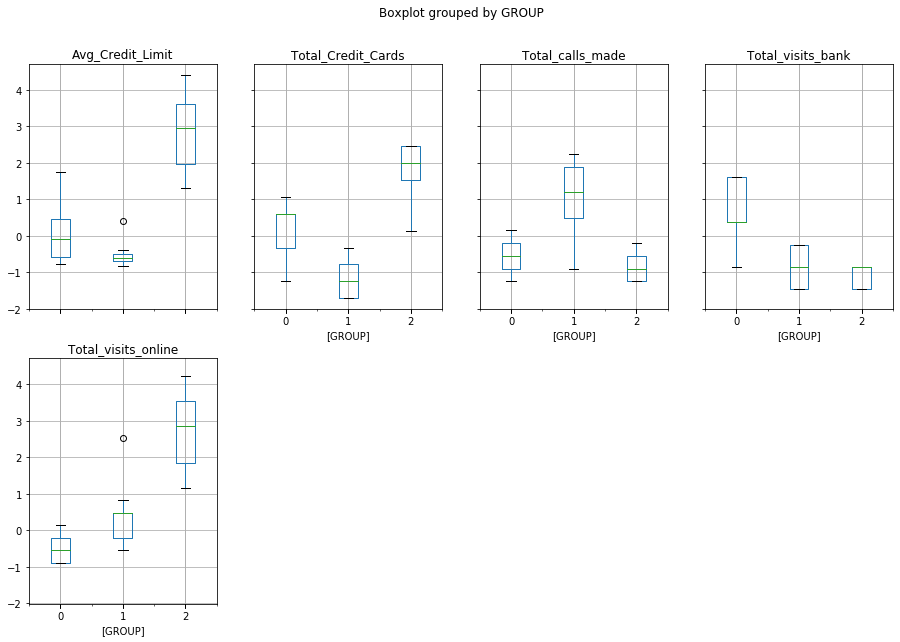

In [77]:
CustomerCCScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

### Determine Number of Clusters with Silhouette Scores Method

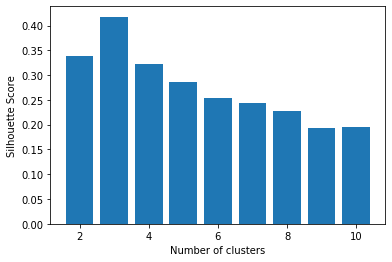

In [79]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

### Kmeans with Different Number of Clusters from 2 to 20

In [81]:
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.338
Silhouette score for 3 cluster k-means: 0.418
Silhouette score for 4 cluster k-means: 0.323
Silhouette score for 5 cluster k-means: 0.285
Silhouette score for 6 cluster k-means: 0.254
Silhouette score for 7 cluster k-means: 0.238
Silhouette score for 8 cluster k-means: 0.213
Silhouette score for 9 cluster k-means: 0.193
Silhouette score for 10 cluster k-means: 0.222
Silhouette score for 11 cluster k-means: 0.183
Silhouette score for 12 cluster k-means: 0.186
Silhouette score for 13 cluster k-means: 0.185
Silhouette score for 14 cluster k-means: 0.184
Silhouette score for 15 cluster k-means: 0.182
Silhouette score for 16 cluster k-means: 0.166
Silhouette score for 17 cluster k-means: 0.168
Silhouette score for 18 cluster k-means: 0.175
Silhouette score for 19 cluster k-means: 0.177


Deciding, between 2nd cluster and the 3rd and 4th cluster models will be completed at the end of this analysis by charts.

In [82]:
kmeans4 = df_std.copy()

In [83]:
kmeans4_  = KMeans(n_clusters=4, random_state=40).fit(kmeans4) #without 'predict' we do not labels yet.

## Hierarchical Clustering

In [84]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [86]:
HCmodel.fit(CustomerCCScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [88]:
CustomerCCScaled['labels'] = model.labels_
CustomerCCScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0,4
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0,3
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0,3
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2,2
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,1,1
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,2,2
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,1,6
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,1,6
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,1,6


In [89]:
CustomerCCDataClust = CustomerCCScaled.groupby(['labels'])

In [90]:
CustomerCCDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,
0,-0.454139,0.272743,1.247700,-0.504878,-1.027789,0
1,-0.588757,-1.131460,-0.960578,0.391697,1.806324,1
2,2.630723,1.777079,-1.064877,2.065999,-0.850528,2
3,-0.426743,0.509622,0.022673,-0.561125,-0.528556,0
4,0.608335,0.157942,0.077942,-0.596775,-0.544589,0
5,3.067768,1.962181,-1.153759,3.721044,-0.902271,2
6,-0.601272,-1.003750,-0.855583,0.269564,0.636164,1
7,0.528742,0.732748,1.151108,-0.561125,-0.548348,0
8,-0.414658,0.121268,1.286030,-0.526184,-0.132794,0


0    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
1    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
2    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
3    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
4    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
5    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
6    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
7    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
8    [[AxesSubplot(0.1,0.679412;0.363636x0.220588),...
dtype: object

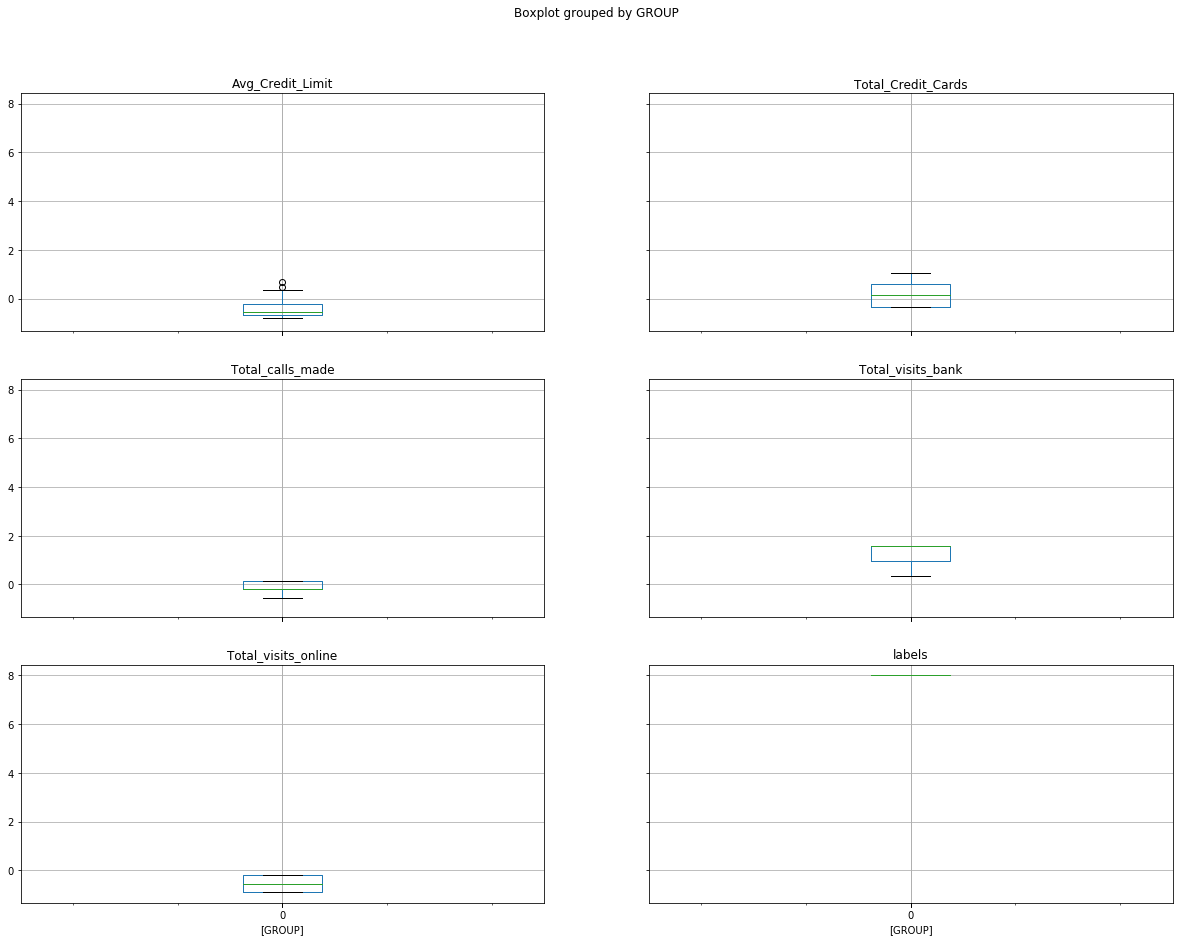

In [160]:
CustomerCCDataClust.boxplot(by='GROUP', layout = (3,9),figsize=(20,15))

In [95]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustomerCCScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(CustomerCCScaled))

c

0.823869180065824

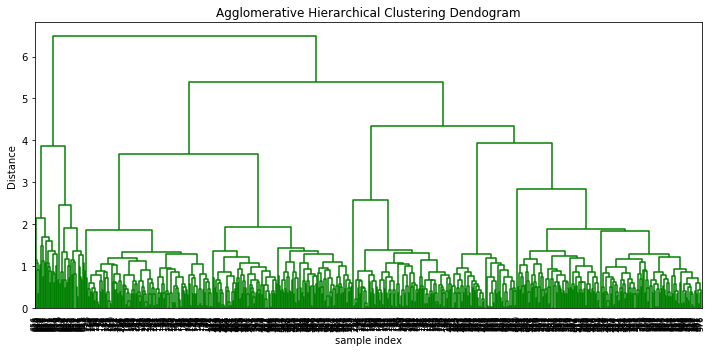

In [96]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [99]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustomerCCScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(CustomerCCScaled))

c

0.8416459809533562

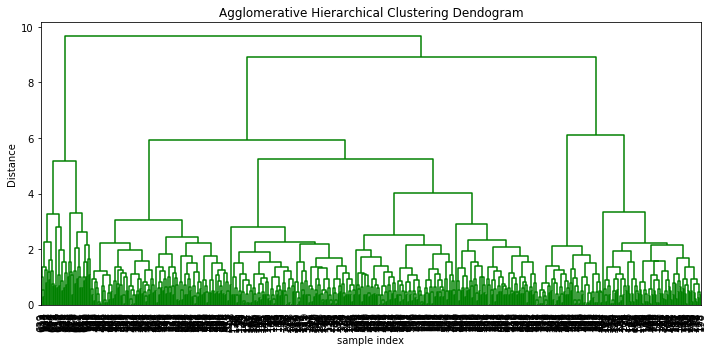

In [100]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [101]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustomerCCScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(CustomerCCScaled))

c

0.7412412683476687

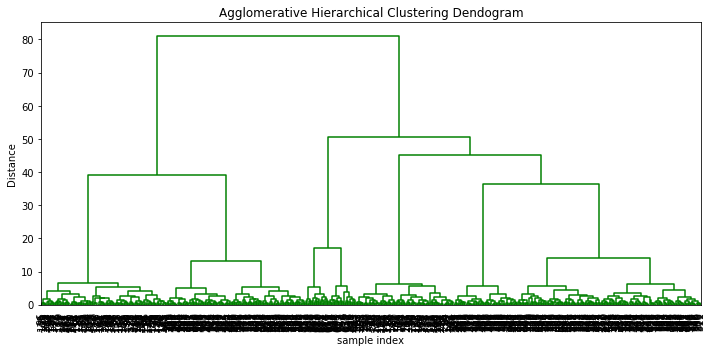

In [102]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [104]:
silhouette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        silhouette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(silhouette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [105]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.512724,average,2
2,2,0.512724,complete,2
4,4,0.374967,average,4
0,2,0.338113,ward,2
7,6,0.314629,average,6
3,4,0.312139,ward,4
5,4,0.284308,complete,4
6,6,0.238215,ward,6
10,8,0.217247,average,8
8,6,0.213759,complete,6


Best values represented by 51% in 2 cluster model. Due to the results, choose linkage_method :average , number of cluster:2 The silhouette score of the Agglomerative Clustering solution: 0.512724.
            
            
            

## Comparing Results for the Optimal Number of Cluster Model

In [130]:
kmeans4_      = KMeans(n_clusters=3, random_state=40).fit_predict(df_std)

In [131]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3).fit_predict(df_std)

In [132]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')

In [133]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ],
                                ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method', 'Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.417872
0,KMeans,0.417743


In [141]:
Customer_CC_df['cluster'] = hierarchical_ 

In [142]:
Customer_CC_df['cluster'].value_counts()

0    387
2    223
1     50
Name: cluster, dtype: int64

In [153]:
kmeans4_  = KMeans(n_clusters=3, random_state=40).fit(df_std)
Customer_CC_df['cluster'] = kmeans4_.labels_

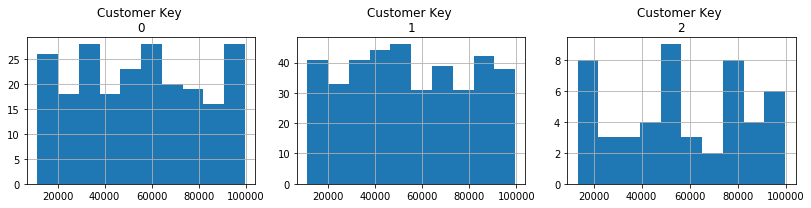

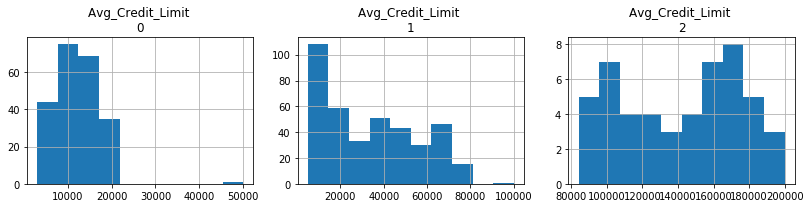

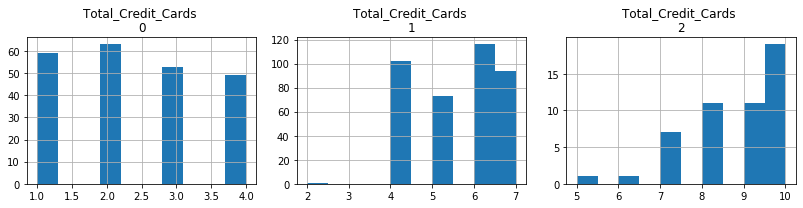

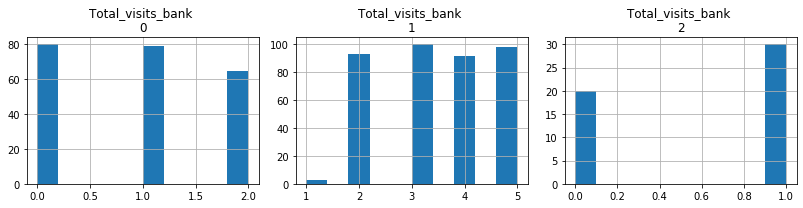

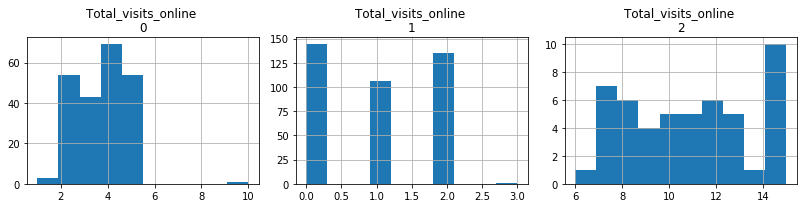

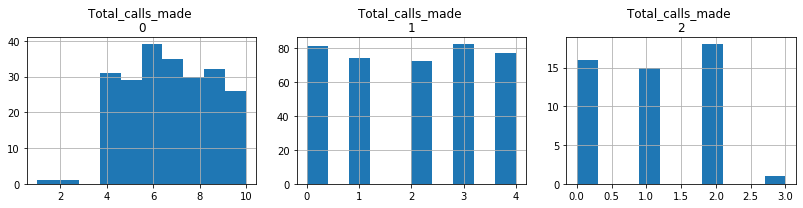

In [156]:
col_list= ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


for column in col_list:
    plt.figure(figsize=(15,3))
    for i in range(0,3):
        plt.subplot(1,4,i+1)
        cluster = Customer_CC_df[Customer_CC_df['cluster']==i]
        cluster[column].hist()
        plt.title('{} \n{}'.format(column, i))
        
    plt.tight_layout()
    plt.show()
    

<Figure size 1800x1800 with 0 Axes>

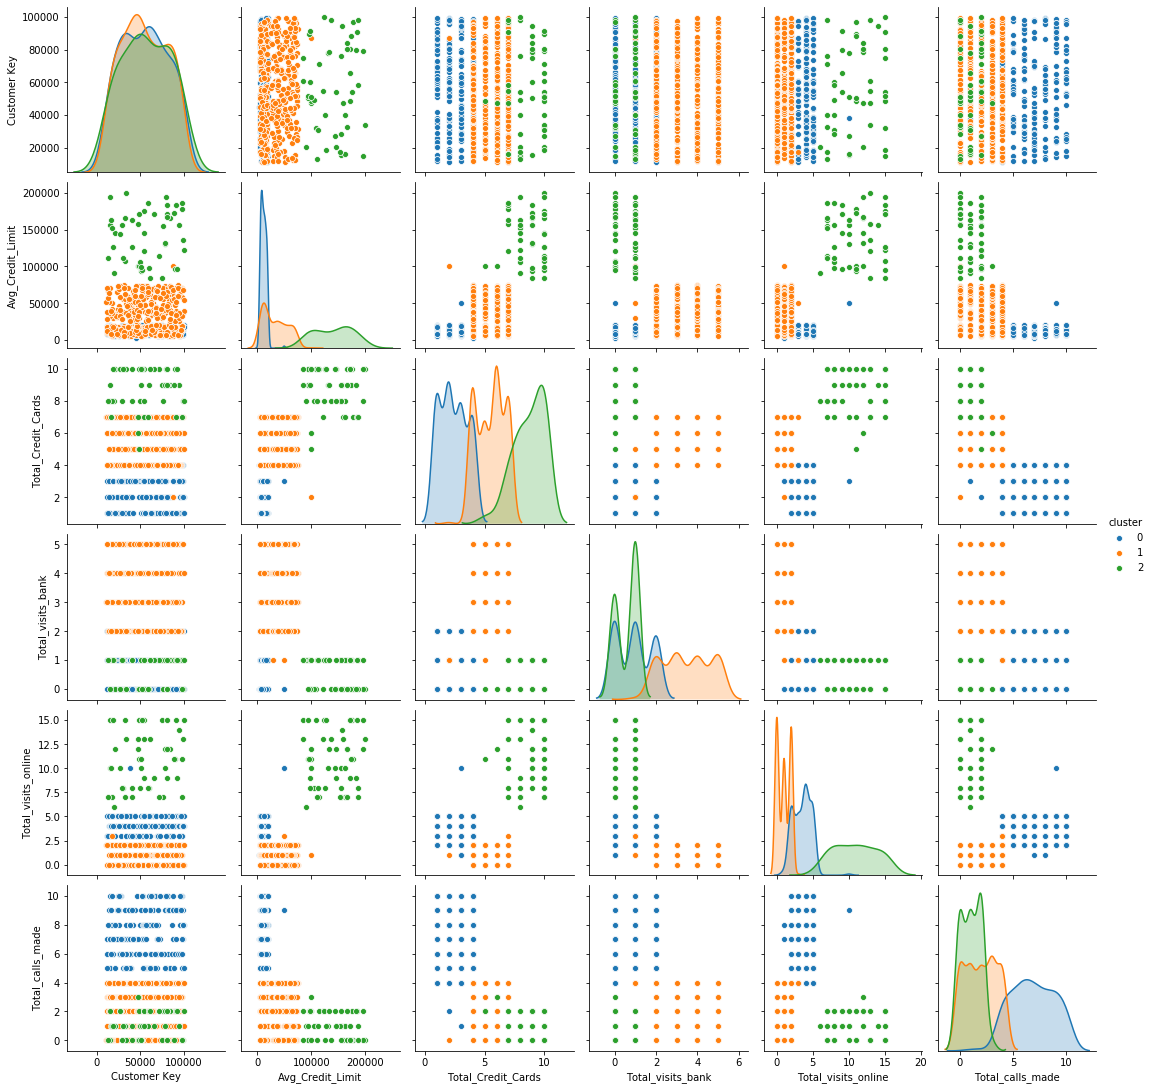

In [157]:
best_columns = ['Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

best_columns.append("cluster")
plt.figure(figsize=(25,25))
sns.pairplot( Customer_CC_df[best_columns], hue="cluster")

## Conclusion

There are three (3) main clusters based on the data provided.

Cluster 0: Appears to be customers with medium disposable income based on credit limit. The have an average number of credit cards which is greater than cluster 1 but less than cluster 2.

Cluster 1: Appears to be customers with lower disposable income based on credit limit. They have on average the least amount of credit cards.

Cluster 2: Appears to be customers with higher disposable income based on credit limit. They have on average more credit cards.

Cluster 1 and 2 make the about the same number of calls. Cluster 0 makes the most calls out of all three (3) clusters.

Cluster 1 makes the most visits to the bank, while clusters 0 and 2 make fewer visits to the bank on average.

Cluster 2 makes the most visits online, while cluster 1 makes the least and cluster 0 is in the middle for amount of visits to the bank online.

## Recommendation 

Based on the findings the bank should seek to service and market cluster 2 customers by focsuing on online marketing strategies.

Based on the findings the bank should seek to service and market cluster 1 customers by focusing on in bank marketing strategies.

Based on the finsgins the bank should seek to service and market cluster 0 customers by focusing on more phone call based makrketing strategies.